# Smooth capacitor study
In this notebook we use the libraries in `smooth_capacitor_library.py` <br>
- `digit_tee_library`: a SmoothCapacitor element attached to a tee on one end (+ waveguides at the other tee terminations) and to a simple waveguide to the other end.
- `smooth_capacitor_library` a SmoothCapacitor element with both ends attached to simple waveguides.

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from modeling.elements.smooth_capacitor.libraries.smooth_capacitor_library import digit_tee_library, smooth_capacitor_library, make_library

In [31]:
_, cm = make_library("digittee_capacitance_library_sim_q3d_results.csv", 200, return_cmatrix = True)
ck_ = cm[:, 0, 1]
fc = np.linspace(1, 5, len(ck_))

In [32]:
finger_control = np.linspace(1.0, 5, 1001)
digit_tee_lib = digit_tee_library()
smooth_capacitor_lib = smooth_capacitor_library()

C12_digit = digit_tee_lib(finger_control)[:, 0, 1]
C12_smooth = smooth_capacitor_lib(finger_control)[:, 0, 1]

Text(0, 0.5, 'C12')

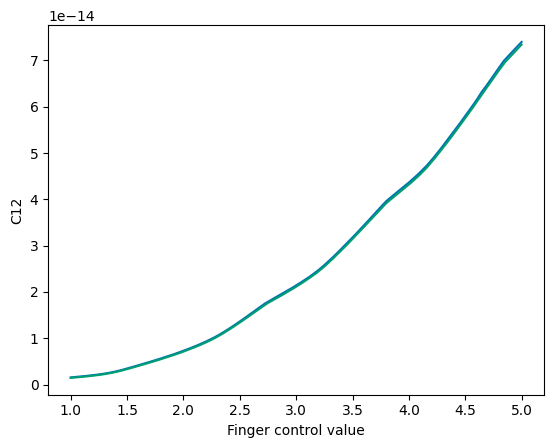

In [33]:
plt.plot(finger_control, C12_digit)
plt.plot(finger_control, C12_smooth)
plt.xlabel("Finger control value")
plt.ylabel("C12")

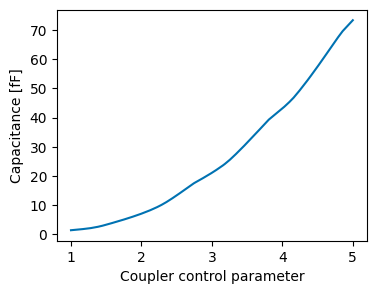

In [34]:
plt.figure(figsize=(4,3))
plt.plot(finger_control, C12_smooth*1e15)
plt.xlabel("Coupler control parameter")
plt.ylabel("Capacitance [fF]")
plt.savefig("smooth_cap.svg", bbox_inches = "tight")

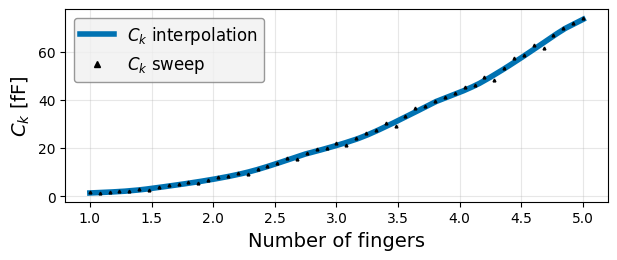

In [39]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-colorblind")

fig, ax1 = plt.subplots(
    1, 1, sharex=True, figsize=(7, 2.5)
)

# --- Top plot -------------------------------------------------------
l1, = ax1.plot(
    finger_control, C12_smooth / 1e-15,
    color="C0", linewidth=4, label=r"Fit $C_k$"
)
l2, = ax1.plot(
    fc[::2], ck_[::2] / 1e-15,
    marker="^", markersize=2, linestyle="None",
    color="black", label="Data"
)
ax1.set_ylabel(r"$C_k$ [fF]", fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel(r"Number of fingers", fontsize=14)

leg1 = ax1.legend(
    handles=[l1, l2],
    labels=[r"$C_k$ interpolation", r"$C_k$ sweep"],
    frameon=True,
    fontsize=12,          # keep text size
    facecolor="#f0f0f0",
    edgecolor="gray",
    markerscale=2.5       # <-- enlarge only the marker symbol
)
plt.savefig("sweep_finger.svg", bbox_inches="tight")
plt.show()



In [36]:
finger_control

array([1.   , 1.004, 1.008, ..., 4.992, 4.996, 5.   ])